In [15]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\Moon-Touched\AppData\Local\Temp\ipykernel_20748\2001321390.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


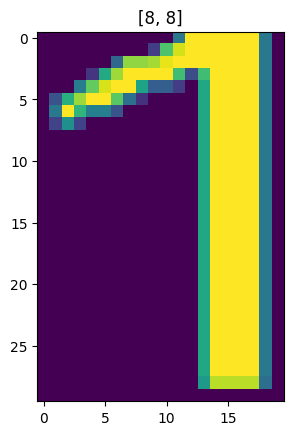

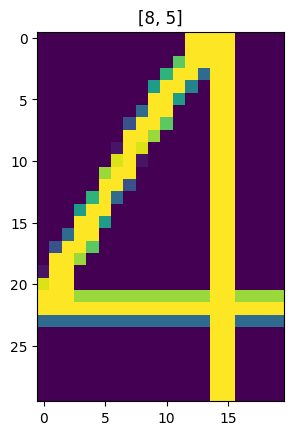

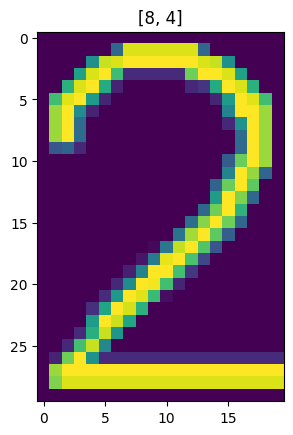

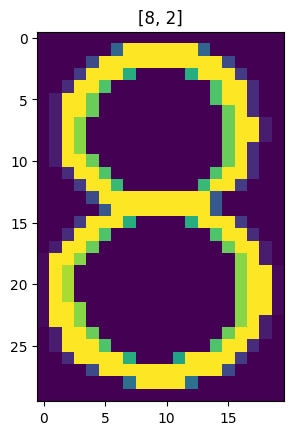

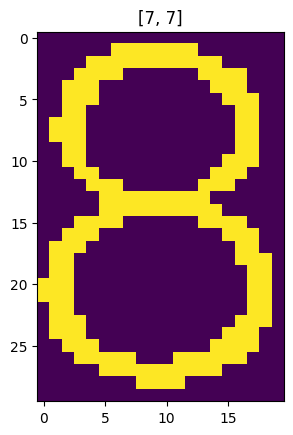

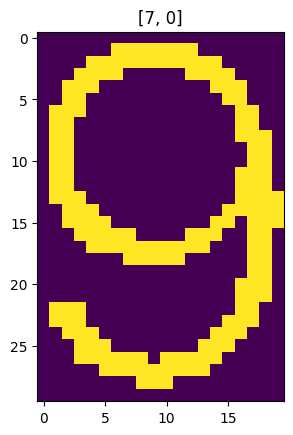

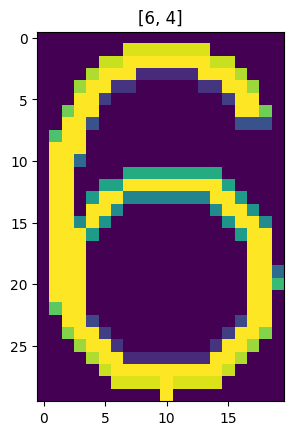

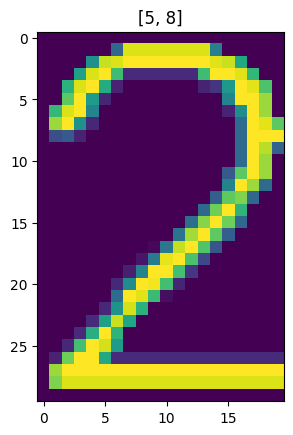

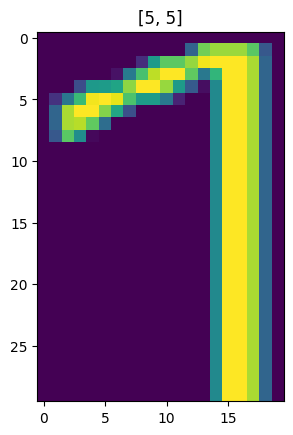

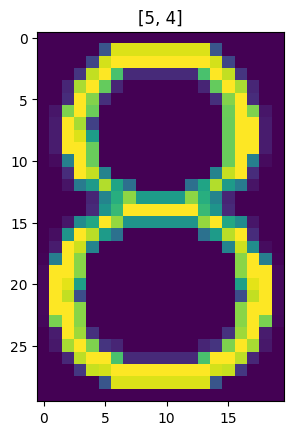

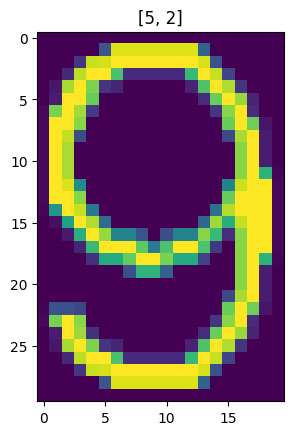

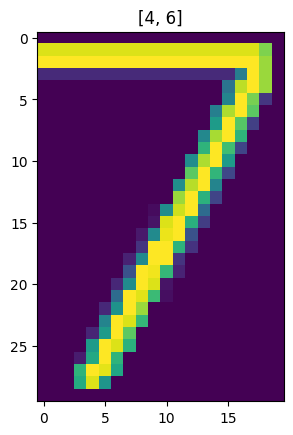

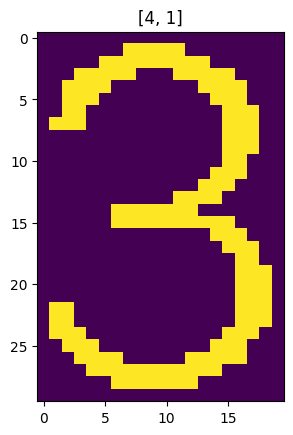

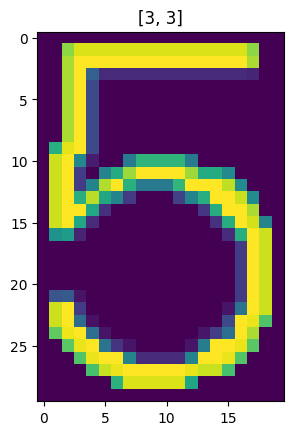

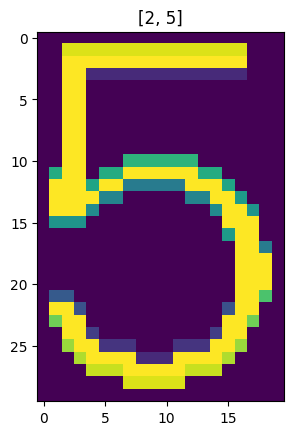

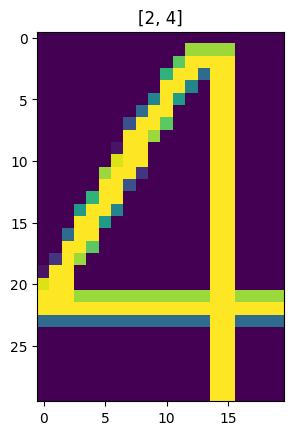

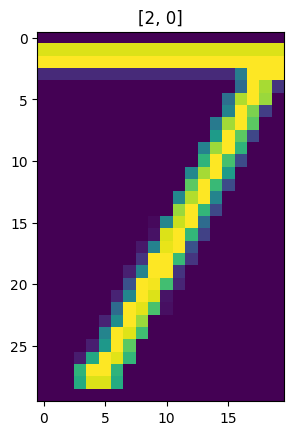

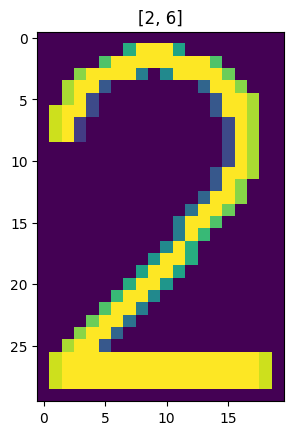

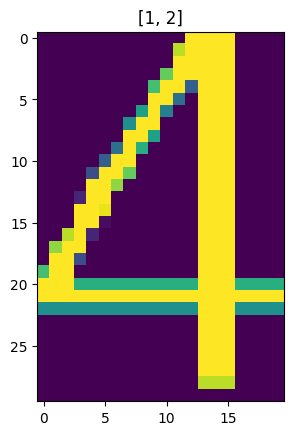

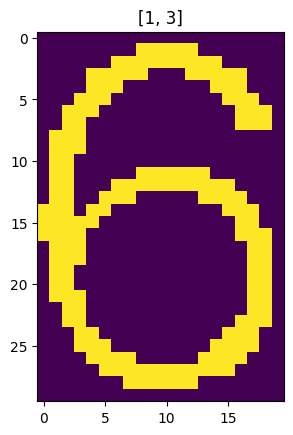

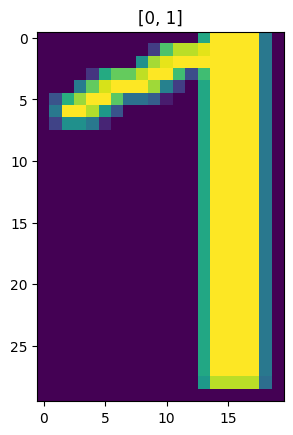

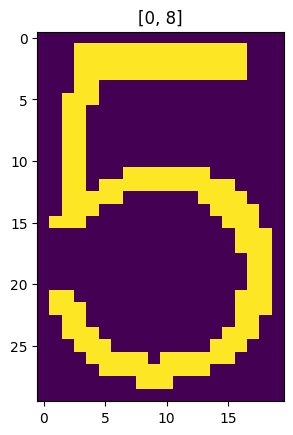

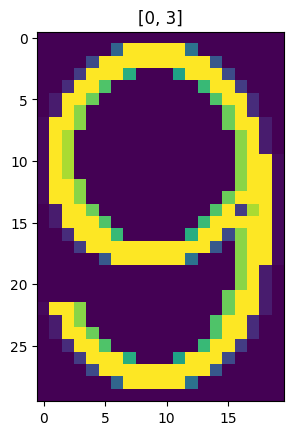

In [16]:
image = cv2.imread("./board/example.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

# 裁掉边框外的无用像素
blurred_image = cv2.GaussianBlur(binary_image, (5, 5), 0)
edged_image = cv2.Canny(blurred_image, 30, 150)
contours, _ = cv2.findContours(edged_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
column, row, width, height = cv2.boundingRect(largest_contour)
binary_image = binary_image[row : row + height, column : column + width]
box_size = height // 9

# 获取线条
lines = cv2.HoughLinesP(binary_image, 1, np.pi / 180, threshold=100, minLineLength=5, maxLineGap=10)
# 在原图上绘制抹去检测到的线条
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(binary_image, (x1, y1), (x2, y2), 0, 5)

# 检测文字边界并裁剪填入sub_board
sub_boards = np.zeros([9, 9], dtype=object)
blurred_image = cv2.GaussianBlur(binary_image, (5, 5), 0)
edged_image = cv2.Canny(blurred_image, 30, 150)
contours, _ = cv2.findContours(edged_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
    column, row, width, height = cv2.boundingRect(c)
    i=row//box_size
    j=column//box_size
    sub_boards[i,j]=cv2.resize(binary_image[row : row + height, column : column + width],(20, 30))
    plt.figure()
    plt.imshow(sub_boards[i,j])
    plt.title(f"{[i,j]}")
    #cv2.imwrite(f"{i},{j}.png",sub_boards[i,j])